In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data2=pd.read_csv('test.csv')

In [3]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_data2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
raw_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [6]:
pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',999)
raw_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [7]:
columns_to_drop = ['Id','HeatingQC','PoolQC','Electrical','GarageYrBlt','LotFrontage','FireplaceQu','LowQualFinSF','RoofStyle','Heating','GarageType','GarageFinish','GarageQual','GarageCond','ScreenPorch','3SsnPorch','LandSlope','MSZoning','Street','Alley','LandContour','Utilities','Condition1','Condition2','MasVnrType','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','SaleType','SaleCondition','MiscVal','MiscFeature','Fence']

In [8]:
data1 = raw_data.drop(columns=columns_to_drop)

In [9]:
data1

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SalePrice
0,60,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,CompShg,VinylSd,VinylSd,196.0,Gd,PConc,856,Y,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,2,2008,208500
1,20,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,CompShg,MetalSd,MetalSd,0.0,TA,CBlock,1262,Y,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,5,2007,181500
2,60,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,CompShg,VinylSd,VinylSd,162.0,Gd,PConc,920,Y,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,9,2008,223500
3,70,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,CompShg,Wd Sdng,Wd Shng,0.0,TA,BrkTil,756,Y,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,2,2006,140000
4,60,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,CompShg,VinylSd,VinylSd,350.0,Gd,PConc,1145,Y,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,Reg,Inside,Gilbert,1Fam,2Story,6,5,1999,2000,CompShg,VinylSd,VinylSd,0.0,TA,PConc,953,Y,953,694,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,8,2007,175000
1456,20,13175,Reg,Inside,NWAmes,1Fam,1Story,6,6,1978,1988,CompShg,Plywood,Plywood,119.0,TA,CBlock,1542,Y,2073,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,2,2010,210000
1457,70,9042,Reg,Inside,Crawfor,1Fam,2Story,7,9,1941,2006,CompShg,CemntBd,CmentBd,0.0,Ex,Stone,1152,Y,1188,1152,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,5,2010,266500
1458,20,9717,Reg,Inside,NAmes,1Fam,1Story,5,6,1950,1996,CompShg,MetalSd,MetalSd,0.0,TA,CBlock,1078,Y,1078,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,4,2010,142125


In [10]:
data1.describe(include='all')

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1452.000000,1460,1460,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
unique,NaN,NaN,4,5,25,5,8,NaN,NaN,NaN,NaN,8,15,16,NaN,4,6,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Reg,Inside,NAmes,1Fam,1Story,NaN,NaN,NaN,NaN,CompShg,VinylSd,VinylSd,NaN,TA,PConc,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,925,1052,225,1220,726,NaN,NaN,NaN,NaN,1434,515,504,NaN,906,647,NaN,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,NaN,NaN,1340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,56.897260,10516.828082,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,103.685262,NaN,NaN,1057.429452,NaN,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,1.767123,472.980137,NaN,94.244521,46.660274,21.954110,2.758904,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,181.066207,NaN,NaN,438.705324,NaN,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,0.747315,213.804841,NaN,125.338794,66.256028,61.119149,40.177307,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1954.000000,1967.000000,NaN,NaN,NaN,0.000000,NaN,NaN,795.750000,NaN,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,1.000000,334.500000,NaN,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1973.000000,1994.000000,NaN,NaN,NaN,0.000000,NaN,NaN,991.500000,NaN,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,1.000000,2.000000,480.000000,NaN,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2000.000000,2004.000000,NaN,NaN,NaN,166.000000,NaN,NaN,1298.250000,NaN,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,2.000000,576.000000,NaN,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000


In [11]:
data1.isnull().sum()

MSSubClass       0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       8
ExterQual        0
Foundation       0
TotalBsmtSF      0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
PoolArea         0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [12]:
data_no_mv = data1.dropna(axis=0)

In [13]:
data_no_mv.isnull().sum()

MSSubClass       0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
Foundation       0
TotalBsmtSF      0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
PoolArea         0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [14]:
data_no_mv.describe(include='all')

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SalePrice
count,1452.000000,1452.000000,1452,1452,1452,1452,1452,1452.000000,1452.000000,1452.000000,1452.000000,1452,1452,1452,1452.000000,1452,1452,1452.000000,1452,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452,1452.000000,1452,1452.000000,1452.000000,1452.000000,1452,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
unique,NaN,NaN,4,5,25,5,8,NaN,NaN,NaN,NaN,8,15,16,NaN,4,6,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Reg,Inside,NAmes,1Fam,1Story,NaN,NaN,NaN,NaN,CompShg,VinylSd,VinylSd,NaN,TA,PConc,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,919,1046,225,1213,721,NaN,NaN,NaN,NaN,1426,510,499,NaN,906,639,NaN,1357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,734,NaN,1353,NaN,NaN,NaN,1332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,56.949036,10507.276171,NaN,NaN,NaN,NaN,NaN,6.092975,5.579201,1971.116391,1984.775482,NaN,NaN,NaN,103.685262,NaN,NaN,1055.847107,NaN,1161.270661,346.944215,1514.091598,0.423554,0.057851,1.562672,0.381543,2.867080,1.046143,NaN,6.517218,NaN,0.612259,1.765152,472.475207,NaN,94.416667,46.390496,21.937328,2.774105,6.318182,2007.815427,180615.063361
std,42.340097,9989.563592,NaN,NaN,NaN,NaN,NaN,1.381289,1.113136,30.193761,20.652466,NaN,NaN,NaN,181.066207,NaN,NaN,438.119089,NaN,385.018424,436.370724,525.627765,0.518782,0.239372,0.550231,0.502664,0.814812,0.219498,NaN,1.626065,NaN,0.643422,0.748496,214.106397,NaN,125.393706,66.048619,61.089879,40.287389,2.699644,1.328927,79285.541485
min,20.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7538.750000,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1954.000000,1966.000000,NaN,NaN,NaN,0.000000,NaN,NaN,794.750000,NaN,882.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,1.000000,327.750000,NaN,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1972.000000,1993.000000,NaN,NaN,NaN,0.000000,NaN,NaN,990.500000,NaN,1086.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,1.000000,2.000000,478.000000,NaN,0.000000,24.000000,0.000000,0.000000,6.000000,2008.000000,162700.000000
75%,70.000000,11600.000000,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2000.000000,2004.000000,NaN,NaN,NaN,166.000000,NaN,NaN,1297.250000,NaN,1391.000000,728.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,2.000000,576.000000,NaN,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000


/var/folders/cg/vh60y0p54f1532hfvb2nv_980000gn/T/ipykernel_58668/3474831482.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_no_mv.hist(ax=ax)


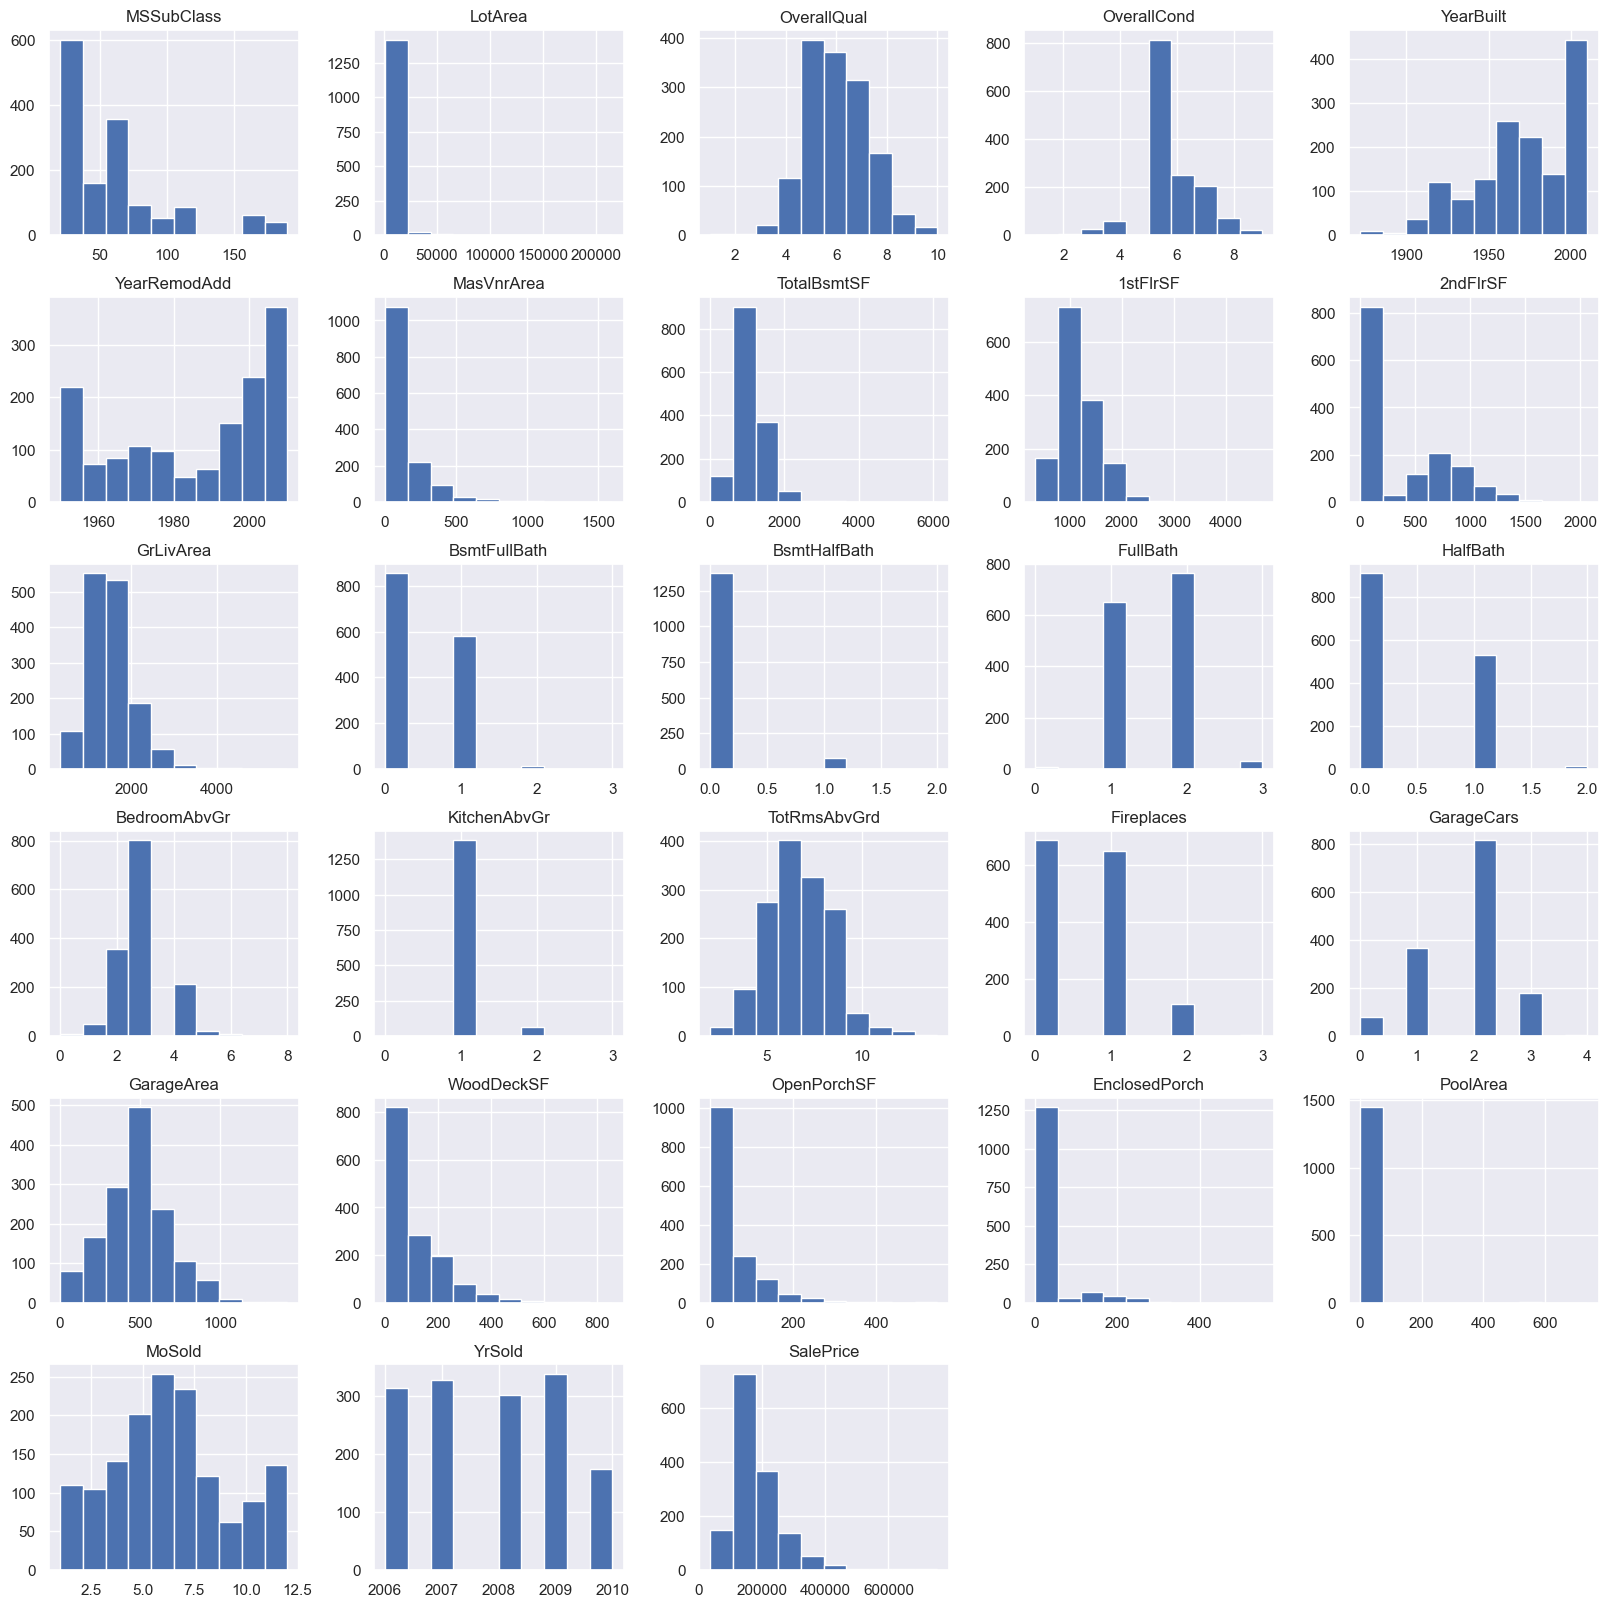

In [15]:
fig = plt.figure(figsize=(20,20))
ax=fig.gca()
data_no_mv.hist(ax=ax)
plt.show()

In [16]:
data_no_mv.describe(include='all')

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SalePrice
count,1452.000000,1452.000000,1452,1452,1452,1452,1452,1452.000000,1452.000000,1452.000000,1452.000000,1452,1452,1452,1452.000000,1452,1452,1452.000000,1452,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452,1452.000000,1452,1452.000000,1452.000000,1452.000000,1452,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
unique,NaN,NaN,4,5,25,5,8,NaN,NaN,NaN,NaN,8,15,16,NaN,4,6,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Reg,Inside,NAmes,1Fam,1Story,NaN,NaN,NaN,NaN,CompShg,VinylSd,VinylSd,NaN,TA,PConc,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,919,1046,225,1213,721,NaN,NaN,NaN,NaN,1426,510,499,NaN,906,639,NaN,1357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,734,NaN,1353,NaN,NaN,NaN,1332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,56.949036,10507.276171,NaN,NaN,NaN,NaN,NaN,6.092975,5.579201,1971.116391,1984.775482,NaN,NaN,NaN,103.685262,NaN,NaN,1055.847107,NaN,1161.270661,346.944215,1514.091598,0.423554,0.057851,1.562672,0.381543,2.867080,1.046143,NaN,6.517218,NaN,0.612259,1.765152,472.475207,NaN,94.416667,46.390496,21.937328,2.774105,6.318182,2007.815427,180615.063361
std,42.340097,9989.563592,NaN,NaN,NaN,NaN,NaN,1.381289,1.113136,30.193761,20.652466,NaN,NaN,NaN,181.066207,NaN,NaN,438.119089,NaN,385.018424,436.370724,525.627765,0.518782,0.239372,0.550231,0.502664,0.814812,0.219498,NaN,1.626065,NaN,0.643422,0.748496,214.106397,NaN,125.393706,66.048619,61.089879,40.287389,2.699644,1.328927,79285.541485
min,20.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7538.750000,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1954.000000,1966.000000,NaN,NaN,NaN,0.000000,NaN,NaN,794.750000,NaN,882.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,1.000000,327.750000,NaN,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1972.000000,1993.000000,NaN,NaN,NaN,0.000000,NaN,NaN,990.500000,NaN,1086.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,1.000000,2.000000,478.000000,NaN,0.000000,24.000000,0.000000,0.000000,6.000000,2008.000000,162700.000000
75%,70.000000,11600.000000,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2000.000000,2004.000000,NaN,NaN,NaN,166.000000,NaN,NaN,1297.250000,NaN,1391.000000,728.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,2.000000,576.000000,NaN,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000


In [17]:
q = data_no_mv['LotArea'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['LotArea']<q]
data_1.describe(include='all')

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SalePrice
count,1437.000000,1437.000000,1437,1437,1437,1437,1437,1437.000000,1437.000000,1437.000000,1437.000000,1437,1437,1437,1437.000000,1437,1437,1437.000000,1437,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437,1437.000000,1437,1437.000000,1437.000000,1437.000000,1437,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000
unique,NaN,NaN,4,5,25,5,8,NaN,NaN,NaN,NaN,6,15,16,NaN,4,6,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Reg,Inside,NAmes,1Fam,1Story,NaN,NaN,NaN,NaN,CompShg,VinylSd,VinylSd,NaN,TA,PConc,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,919,1040,225,1199,714,NaN,NaN,NaN,NaN,1416,509,498,NaN,898,634,NaN,1342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,729,NaN,1342,NaN,NaN,NaN,1318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,57.035491,9762.816284,NaN,NaN,NaN,NaN,NaN,6.083507,5.577592,1971.105080,1984.712596,NaN,NaN,NaN,102.323591,NaN,NaN,1046.961030,NaN,1153.487822,345.255393,1504.681280,0.416145,0.057759,1.559499,0.381350,2.867084,1.046625,NaN,6.503827,NaN,0.600557,1.759916,470.521225,NaN,92.231733,45.837857,22.131524,2.469033,6.313848,2007.814892,179528.790536
std,42.335798,4202.736920,NaN,NaN,NaN,NaN,NaN,1.374251,1.114165,30.235095,20.669947,NaN,NaN,NaN,178.847900,NaN,NaN,412.667125,NaN,368.868066,434.436927,506.098253,0.512480,0.239262,0.546044,0.502792,0.810625,0.220591,NaN,1.610210,NaN,0.633731,0.749267,212.682169,NaN,121.555517,65.093062,61.365123,38.487182,2.697809,1.330163,78325.681972
min,20.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7500.000000,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1954.000000,1966.000000,NaN,NaN,NaN,0.000000,NaN,NaN,793.000000,NaN,880.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,1.000000,325.000000,NaN,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129500.000000
50%,50.000000,9416.000000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1972.000000,1993.000000,NaN,NaN,NaN,0.000000,NaN,NaN,988.000000,NaN,1080.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,1.000000,2.000000,478.000000,NaN,0.000000,24.000000,0.000000,0.000000,6.000000,2008.000000,161750.000000
75%,70.000000,11475.000000,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2000.000000,2004.000000,NaN,NaN,NaN,164.000000,NaN,NaN,1278.000000,NaN,1381.000000,728.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,2.000000,576.000000,NaN,168.000000,67.000000,0.000000,0.000000,8.000000,2009.000000,212900.000000


In [18]:
q = data_1['TotalBsmtSF'].quantile(0.99)
data_2 = data_1[data_1['TotalBsmtSF']<q]
data_2.describe(include='all')

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SalePrice
count,1422.000000,1422.000000,1422,1422,1422,1422,1422,1422.000000,1422.000000,1422.000000,1422.000000,1422,1422,1422,1422.000000,1422,1422,1422.000000,1422,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422,1422.000000,1422,1422.000000,1422.000000,1422.000000,1422,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
unique,NaN,NaN,4,5,25,5,8,NaN,NaN,NaN,NaN,6,15,16,NaN,4,6,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Reg,Inside,NAmes,1Fam,1Story,NaN,NaN,NaN,NaN,CompShg,VinylSd,VinylSd,NaN,TA,PConc,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,913,1029,222,1184,702,NaN,NaN,NaN,NaN,1404,502,491,NaN,896,622,NaN,1328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,727,NaN,1328,NaN,NaN,NaN,1303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,57.341772,9718.596343,NaN,NaN,NaN,NaN,NaN,6.057665,5.581575,1970.881153,1984.627286,NaN,NaN,NaN,98.504219,NaN,NaN,1031.758790,NaN,1140.970464,345.725035,1492.696203,0.413502,0.057665,1.552743,0.381153,2.864979,1.047117,NaN,6.480309,NaN,0.592827,1.750352,467.676512,NaN,91.283404,45.507032,22.160338,2.104782,6.321378,2007.813643,176981.594937
std,42.421031,4191.819422,NaN,NaN,NaN,NaN,NaN,1.350391,1.116077,30.268734,20.692454,NaN,NaN,NaN,170.489760,NaN,NaN,385.376448,NaN,348.344920,431.233582,488.803640,0.512243,0.239151,0.543365,0.502922,0.809025,0.221700,NaN,1.597180,NaN,0.629582,0.745795,211.195223,NaN,120.660838,65.146192,61.235034,35.803135,2.695179,1.331589,72393.077700
min,20.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7500.000000,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1953.000000,1966.000000,NaN,NaN,NaN,0.000000,NaN,NaN,793.000000,NaN,876.250000,0.000000,1123.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,1.000000,319.250000,NaN,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,50.000000,9375.000000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1972.000000,1993.000000,NaN,NaN,NaN,0.000000,NaN,NaN,980.000000,NaN,1077.000000,0.000000,1452.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,1.000000,2.000000,474.000000,NaN,0.000000,24.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,11420.750000,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2000.000000,2004.000000,NaN,NaN,NaN,160.000000,NaN,NaN,1267.750000,NaN,1367.000000,728.000000,1752.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,2.000000,576.000000,NaN,168.000000,66.000000,0.000000,0.000000,8.000000,2009.000000,209875.000000


In [19]:
q = data_2['1stFlrSF'].quantile(0.99)
data_3 = data_2[data_2['1stFlrSF']<q]
data_3.describe(include='all')

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SalePrice
count,1407.000000,1407.000000,1407,1407,1407,1407,1407,1407.000000,1407.000000,1407.000000,1407.000000,1407,1407,1407,1407.000000,1407,1407,1407.000000,1407,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407,1407.000000,1407,1407.000000,1407.000000,1407.000000,1407,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
unique,NaN,NaN,4,5,25,5,8,NaN,NaN,NaN,NaN,6,15,16,NaN,4,6,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Reg,Inside,NAmes,1Fam,1Story,NaN,NaN,NaN,NaN,CompShg,VinylSd,VinylSd,NaN,TA,PConc,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,905,1022,218,1169,689,NaN,NaN,NaN,NaN,1391,500,489,NaN,889,616,NaN,1313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,723,NaN,1315,NaN,NaN,NaN,1288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,57.697228,9651.141436,NaN,NaN,NaN,NaN,NaN,6.043355,5.579957,1970.788913,1984.557925,NaN,NaN,NaN,97.211087,NaN,NaN,1024.539446,NaN,1129.933191,348.040512,1484.038380,0.410092,0.058280,1.548685,0.380242,2.863539,1.047619,NaN,6.464819,NaN,0.585643,1.744136,465.566453,NaN,90.949538,45.339730,22.108742,2.127221,6.329780,2007.811656,175747.356077
std,42.492900,4133.436238,NaN,NaN,NaN,NaN,NaN,1.345229,1.118433,30.356140,20.722289,NaN,NaN,NaN,168.723819,NaN,NaN,378.390918,NaN,332.649949,431.535174,482.683851,0.511863,0.240349,0.544215,0.502887,0.807944,0.222825,NaN,1.595247,NaN,0.627392,0.745727,210.053599,NaN,120.559564,65.113434,61.224376,35.992948,2.694626,1.331073,71309.749411
min,20.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7460.500000,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1953.000000,1966.000000,NaN,NaN,NaN,0.000000,NaN,NaN,790.000000,NaN,874.000000,0.000000,1120.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,1.000000,313.500000,NaN,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,50.000000,9337.000000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1972.000000,1993.000000,NaN,NaN,NaN,0.000000,NaN,NaN,978.000000,NaN,1072.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,1.000000,2.000000,472.000000,NaN,0.000000,24.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,11344.500000,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2000.000000,2004.000000,NaN,NaN,NaN,159.000000,NaN,NaN,1259.000000,NaN,1357.500000,728.000000,1736.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,2.000000,576.000000,NaN,168.000000,66.000000,0.000000,0.000000,8.000000,2009.000000,207250.000000


In [20]:
q = data_3['GrLivArea'].quantile(0.99)
data_4 = data_3[data_3['GrLivArea']<q]
data_4.describe(include='all')

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SalePrice
count,1392.000000,1392.000000,1392,1392,1392,1392,1392,1392.000000,1392.000000,1392.000000,1392.000000,1392,1392,1392,1392.000000,1392,1392,1392.000000,1392,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392,1392.000000,1392,1392.000000,1392.000000,1392.00000,1392,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000
unique,NaN,NaN,4,5,25,5,8,NaN,NaN,NaN,NaN,6,15,16,NaN,4,6,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Reg,Inside,NAmes,1Fam,1Story,NaN,NaN,NaN,NaN,CompShg,VinylSd,VinylSd,NaN,TA,PConc,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,897,1014,216,1155,689,NaN,NaN,NaN,NaN,1378,497,486,NaN,882,609,NaN,1298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,NaN,1301,NaN,NaN,NaN,1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,57.528736,9573.599138,NaN,NaN,NaN,NaN,NaN,6.024425,5.573994,1970.986351,1984.428879,NaN,NaN,NaN,94.786638,NaN,NaN,1020.879310,NaN,1123.734195,337.325431,1465.497845,0.410920,0.058190,1.538075,0.377155,2.848420,1.047414,NaN,6.416667,NaN,0.577586,1.738506,463.87931,NaN,89.816092,45.106322,21.923851,1.782328,6.332615,2007.814655,173846.673132
std,42.556672,4031.214599,NaN,NaN,NaN,NaN,NaN,1.330711,1.107578,30.150291,20.773866,NaN,NaN,NaN,161.769123,NaN,NaN,376.341377,NaN,328.276978,420.283326,450.087727,0.512219,0.240247,0.534895,0.502326,0.789496,0.222512,NaN,1.528623,NaN,0.622846,0.740536,208.46631,NaN,119.588484,64.763055,59.851697,33.502289,2.700614,1.329903,67903.610059
min,20.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,0.000000,0.00000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7420.000000,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1953.750000,1966.000000,NaN,NaN,NaN,0.000000,NaN,NaN,788.000000,NaN,871.250000,0.000000,1118.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,1.000000,312.00000,NaN,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,128937.500000
50%,50.000000,9294.000000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1972.000000,1993.000000,NaN,NaN,NaN,0.000000,NaN,NaN,975.000000,NaN,1067.500000,0.000000,1437.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,1.000000,2.000000,472.00000,NaN,0.000000,24.000000,0.000000,0.000000,6.000000,2008.000000,159217.000000
75%,70.000000,11303.500000,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2000.000000,2004.000000,NaN,NaN,NaN,157.000000,NaN,NaN,1253.750000,NaN,1340.500000,720.000000,1728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,2.000000,576.00000,NaN,168.000000,65.000000,0.000000,0.000000,8.000000,2009.000000,205000.000000


In [21]:
data_4.isnull().sum()

MSSubClass       0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
Foundation       0
TotalBsmtSF      0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
PoolArea         0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

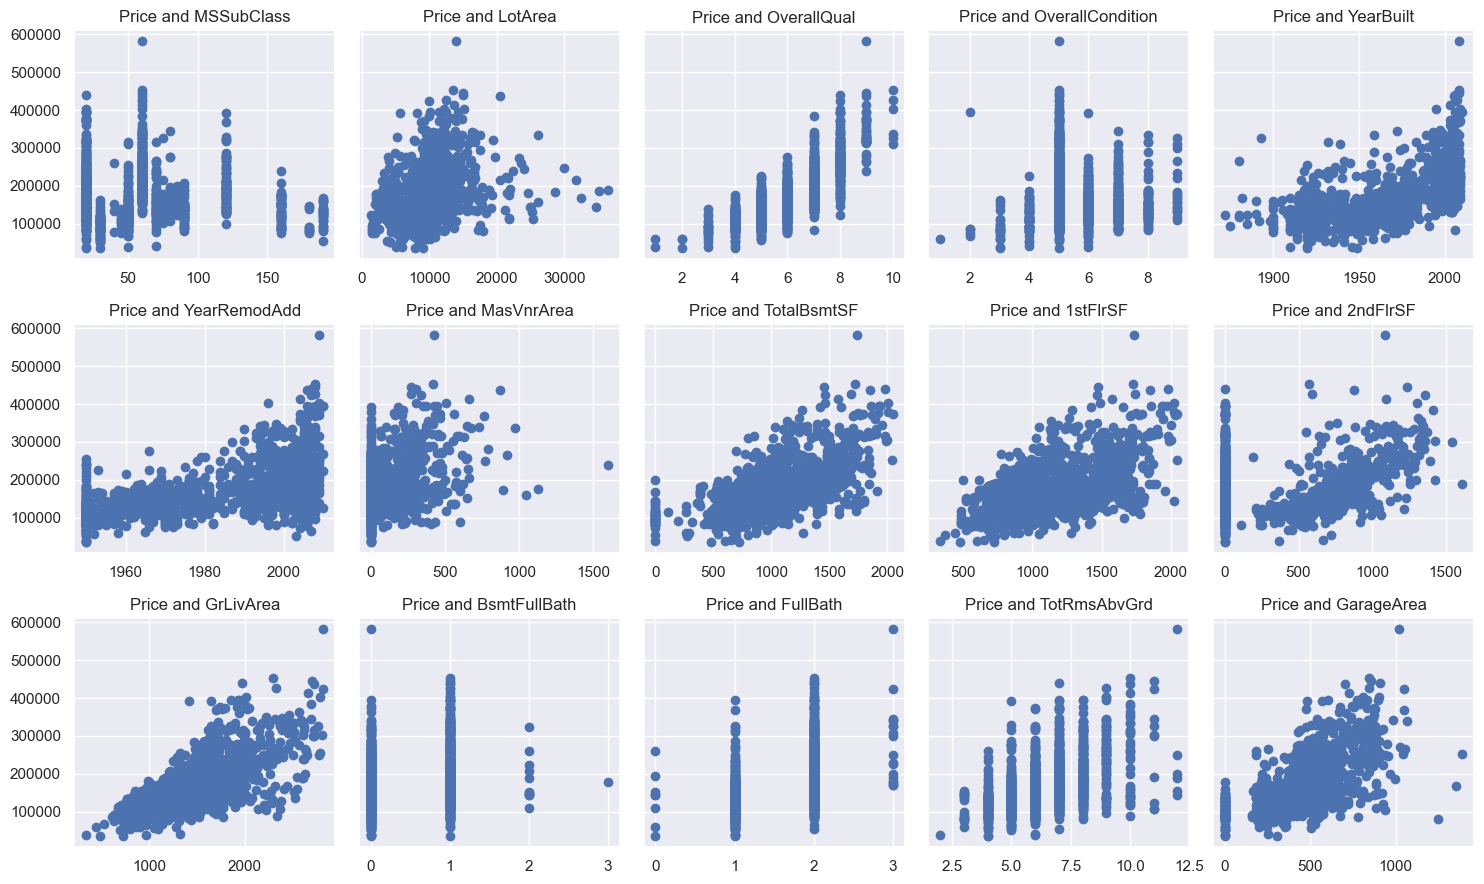

In [22]:
fig, axes = plt.subplots(3, 5, sharey=True, figsize=(15, 9))
axes = axes.flatten()

axes[0].scatter(data_4['MSSubClass'], data_4['SalePrice'])
axes[0].set_title('Price and MSSubClass')

axes[1].scatter(data_4['LotArea'], data_4['SalePrice'])
axes[1].set_title('Price and LotArea')

axes[2].scatter(data_4['OverallQual'], data_4['SalePrice'])
axes[2].set_title('Price and OverallQual')

axes[3].scatter(data_4['OverallCond'], data_4['SalePrice'])
axes[3].set_title('Price and OverallCondition')

axes[4].scatter(data_4['YearBuilt'], data_4['SalePrice'])
axes[4].set_title('Price and YearBuilt')

axes[5].scatter(data_4['YearRemodAdd'], data_4['SalePrice'])
axes[5].set_title('Price and YearRemodAdd')

axes[6].scatter(data_4['MasVnrArea'], data_4['SalePrice'])
axes[6].set_title('Price and MasVnrArea')

axes[7].scatter(data_4['TotalBsmtSF'], data_4['SalePrice'])
axes[7].set_title('Price and TotalBsmtSF')

axes[8].scatter(data_4['1stFlrSF'], data_4['SalePrice'])
axes[8].set_title('Price and 1stFlrSF')

axes[9].scatter(data_4['2ndFlrSF'], data_4['SalePrice'])
axes[9].set_title('Price and 2ndFlrSF')

axes[10].scatter(data_4['GrLivArea'], data_4['SalePrice'])
axes[10].set_title('Price and GrLivArea')

axes[11].scatter(data_4['BsmtFullBath'], data_4['SalePrice'])
axes[11].set_title('Price and BsmtFullBath')

axes[12].scatter(data_4['FullBath'], data_4['SalePrice'])
axes[12].set_title('Price and FullBath')

axes[13].scatter(data_4['TotRmsAbvGrd'], data_4['SalePrice'])
axes[13].set_title('Price and TotRmsAbvGrd')

axes[14].scatter(data_4['GarageArea'], data_4['SalePrice'])
axes[14].set_title('Price and GarageArea')

plt.tight_layout()
plt.show()


In [23]:
data_4

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SalePrice
0,60,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,CompShg,VinylSd,VinylSd,196.0,Gd,PConc,856,Y,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,2,2008,208500
1,20,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,CompShg,MetalSd,MetalSd,0.0,TA,CBlock,1262,Y,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,5,2007,181500
2,60,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,CompShg,VinylSd,VinylSd,162.0,Gd,PConc,920,Y,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,9,2008,223500
3,70,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,CompShg,Wd Sdng,Wd Shng,0.0,TA,BrkTil,756,Y,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,2,2006,140000
4,60,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,CompShg,VinylSd,VinylSd,350.0,Gd,PConc,1145,Y,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,7500,Reg,Inside,Somerst,1Fam,1Story,7,5,2004,2005,CompShg,VinylSd,VinylSd,0.0,Gd,PConc,1221,Y,1221,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,2,400,Y,0,113,0,0,10,2009,185000
1455,60,7917,Reg,Inside,Gilbert,1Fam,2Story,6,5,1999,2000,CompShg,VinylSd,VinylSd,0.0,TA,PConc,953,Y,953,694,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,8,2007,175000
1457,70,9042,Reg,Inside,Crawfor,1Fam,2Story,7,9,1941,2006,CompShg,CemntBd,CmentBd,0.0,Ex,Stone,1152,Y,1188,1152,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,5,2010,266500
1458,20,9717,Reg,Inside,NAmes,1Fam,1Story,5,6,1950,1996,CompShg,MetalSd,MetalSd,0.0,TA,CBlock,1078,Y,1078,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,4,2010,142125


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
variables=data_4[['MSSubClass','LotArea','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','YrSold']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values, i)for i in range(variables.shape[1])]

In [26]:
vif

,VIF
0,3.741899
1,9.388469
2,8338.976215
3,15134.293676
4,24.678955
5,873.516418
6,179.346972
7,1434.779565
8,10.304286
9,12103.738888


In [27]:
data_4 =data_4.drop(['YearRemodAdd'],axis=1)

In [28]:
data_4

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SalePrice
0,60,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,CompShg,VinylSd,VinylSd,196.0,Gd,PConc,856,Y,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,2,2008,208500
1,20,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,CompShg,MetalSd,MetalSd,0.0,TA,CBlock,1262,Y,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,5,2007,181500
2,60,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,CompShg,VinylSd,VinylSd,162.0,Gd,PConc,920,Y,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,9,2008,223500
3,70,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,CompShg,Wd Sdng,Wd Shng,0.0,TA,BrkTil,756,Y,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,2,2006,140000
4,60,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,CompShg,VinylSd,VinylSd,350.0,Gd,PConc,1145,Y,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,7500,Reg,Inside,Somerst,1Fam,1Story,7,5,2004,CompShg,VinylSd,VinylSd,0.0,Gd,PConc,1221,Y,1221,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,2,400,Y,0,113,0,0,10,2009,185000
1455,60,7917,Reg,Inside,Gilbert,1Fam,2Story,6,5,1999,CompShg,VinylSd,VinylSd,0.0,TA,PConc,953,Y,953,694,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,8,2007,175000
1457,70,9042,Reg,Inside,Crawfor,1Fam,2Story,7,9,1941,CompShg,CemntBd,CmentBd,0.0,Ex,Stone,1152,Y,1188,1152,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,5,2010,266500
1458,20,9717,Reg,Inside,NAmes,1Fam,1Story,5,6,1950,CompShg,MetalSd,MetalSd,0.0,TA,CBlock,1078,Y,1078,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,4,2010,142125


In [31]:
variables=data_4[['MSSubClass','LotArea','YearBuilt','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','YrSold']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values, i)for i in range(variables.shape[1])]

In [32]:
vif

,VIF
0,3.739875
1,9.268012
2,6329.713405
3,24.661038
4,873.450189
5,179.323592
6,1434.650645
7,10.284457
8,6080.231578


In [33]:
data_with_dummies = pd.get_dummies(data_4,drop_first=True)
data_with_dummies

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SalePrice,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y
0,60,8450,7,5,2003,196.0,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,2,2008,208500,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
1,20,9600,6,8,1976,0.0,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,5,2007,181500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
2,60,11250,7,5,2001,162.0,920,920,866,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,9,2008,223500,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
3,70,9550,7,5,1915,0.0,756,961,756,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,2,2006,140000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
4,60,14260,8,5,2000,350.0,1145,1145,1053,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,12,2008,250000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,7500,7,5,2004,0.0,1221,1221,0,1221,1,0,2,0,2,1,6,0,2,400,0,113,0,0,10

In [34]:
data_with_dummies.columns.values

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'PoolArea', 'MoSold', 'YrSold', 'SalePrice',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighbo

In [58]:
cols=['SalePrice','MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'PoolArea', 'MoSold', 'YrSold', 
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl',  
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng', 'ExterQual_Fa', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'CentralAir_Y', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1',
       'Functional_Min2', 'Functional_Mod', 'Functional_Sev',
       'Functional_Typ', 'PavedDrive_P', 'PavedDrive_Y']

In [59]:
data_pre_processed=data_with_dummies[cols]
data_pre_processed

,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y
0,208500,60,8450,7,5,2003,196.0,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,2,2008,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
1,181500,20,9600,6,8,1976,0.0,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,5,2007,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
2,223500,60,11250,7,5,2001,162.0,920,920,866,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,9,2008,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
3,140000,70,9550,7,5,1915,0.0,756,961,756,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,2,2006,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
4,250000,60,14260,8,5,2000,350.0,1145,1145,1053,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,12,2008,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,185000,20,7500,7,5,2004,0.0,1221,1221,0,1221,1,0,2,0,2,1,6,0,2,400,0,113,0,0,10,2009,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
1455,175000,60,7917,6,5,1999,

In [60]:
targets = data_pre_processed['SalePrice']
inputs = data_pre_processed.drop(['SalePrice'],axis = 1)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
inputs_scaled=scaler.transform(inputs)

In [62]:
reg =LinearRegression()
reg.fit(inputs,targets)

LinearRegression()

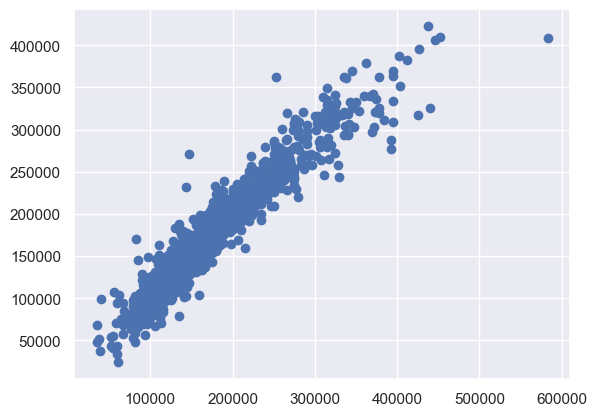

In [63]:
y_hat=reg.predict(inputs)
plt.scatter(targets,y_hat)
plt.show()

In [64]:
df_pf=pd.DataFrame((y_hat),columns=["Predictions"])
df_pf.head()

,Predictions
0,215253.843609
1,196972.841383
2,222323.342809
3,180119.667841
4,286237.210418


test data

In [65]:
raw_data2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [66]:
Testcolumns_to_drop = ['Id','HeatingQC','PoolQC','Electrical','GarageYrBlt','LotFrontage','FireplaceQu','LowQualFinSF','RoofStyle','Heating','GarageType','GarageFinish','GarageQual','GarageCond','ScreenPorch','3SsnPorch','LandSlope','MSZoning','Street','Alley','LandContour','Utilities','Condition1','Condition2','MasVnrType','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','SaleType','SaleCondition','MiscVal','MiscFeature','Fence']

In [67]:
Testdata2 = raw_data2.drop(columns=Testcolumns_to_drop)

In [68]:
Testdata2

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold
0,20,11622,Reg,Inside,NAmes,1Fam,1Story,5,6,1961,1961,CompShg,VinylSd,VinylSd,0.0,TA,CBlock,882.0,Y,896,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,6,2010
1,20,14267,IR1,Corner,NAmes,1Fam,1Story,6,6,1958,1958,CompShg,Wd Sdng,Wd Sdng,108.0,TA,CBlock,1329.0,Y,1329,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,6,2010
2,60,13830,IR1,Inside,Gilbert,1Fam,2Story,5,5,1997,1998,CompShg,VinylSd,VinylSd,0.0,TA,PConc,928.0,Y,928,701,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,3,2010
3,60,9978,IR1,Inside,Gilbert,1Fam,2Story,6,6,1998,1998,CompShg,VinylSd,VinylSd,20.0,TA,PConc,926.0,Y,926,678,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,2.0,470.0,Y,360,36,0,0,6,2010
4,120,5005,IR1,Inside,StoneBr,TwnhsE,1Story,8,5,1992,1992,CompShg,HdBoard,HdBoard,0.0,Gd,PConc,1280.0,Y,1280,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,2.0,506.0,Y,0,82,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,Reg,Inside,MeadowV,Twnhs,2Story,4,7,1970,1970,CompShg,CemntBd,CmentBd,0.0,TA,CBlock,546.0,Y,546,546,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,0.0,0.0,Y,0,0,0,0,6,2006
1455,160,1894,Reg,Inside,MeadowV,TwnhsE,2Story,4,5,1970,1970,CompShg,CemntBd,CmentBd,0.0,TA,CBlock,546.0,Y,546,546,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,1.0,286.0,Y,0,24,0,0,4,2006
1456,20,20000,Reg,Inside,Mitchel,1Fam,1Story,5,7,1960,1996,CompShg,VinylSd,VinylSd,0.0,TA,CBlock,1224.0,Y,1224,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,2.0,576.0,Y,474,0,0,0,9,2006
1457,85,10441,Reg,Inside,Mitchel,1Fam,SFoyer,5,5,1992,1992,CompShg,HdBoard,Wd Shng,0.0,TA,PConc,912.0,Y,970,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,0.0,0.0,Y,80,32,0,0,7,2006


In [69]:
Testdata2.isnull().sum()

MSSubClass        0
LotArea           0
LotShape          0
LotConfig         0
Neighborhood      0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
ExterQual         0
Foundation        0
TotalBsmtSF       1
CentralAir        0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       1
TotRmsAbvGrd      0
Functional        2
Fireplaces        0
GarageCars        1
GarageArea        1
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
PoolArea          0
MoSold            0
YrSold            0
dtype: int64

In [70]:
Testdata_no_mv = Testdata2.dropna(axis=0)

In [71]:
Testdata_no_mv.isnull().sum()

MSSubClass       0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
Foundation       0
TotalBsmtSF      0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
PoolArea         0
MoSold           0
YrSold           0
dtype: int64

/var/folders/cg/vh60y0p54f1532hfvb2nv_980000gn/T/ipykernel_58668/1202140988.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  Testdata_no_mv.hist(ax=ax)


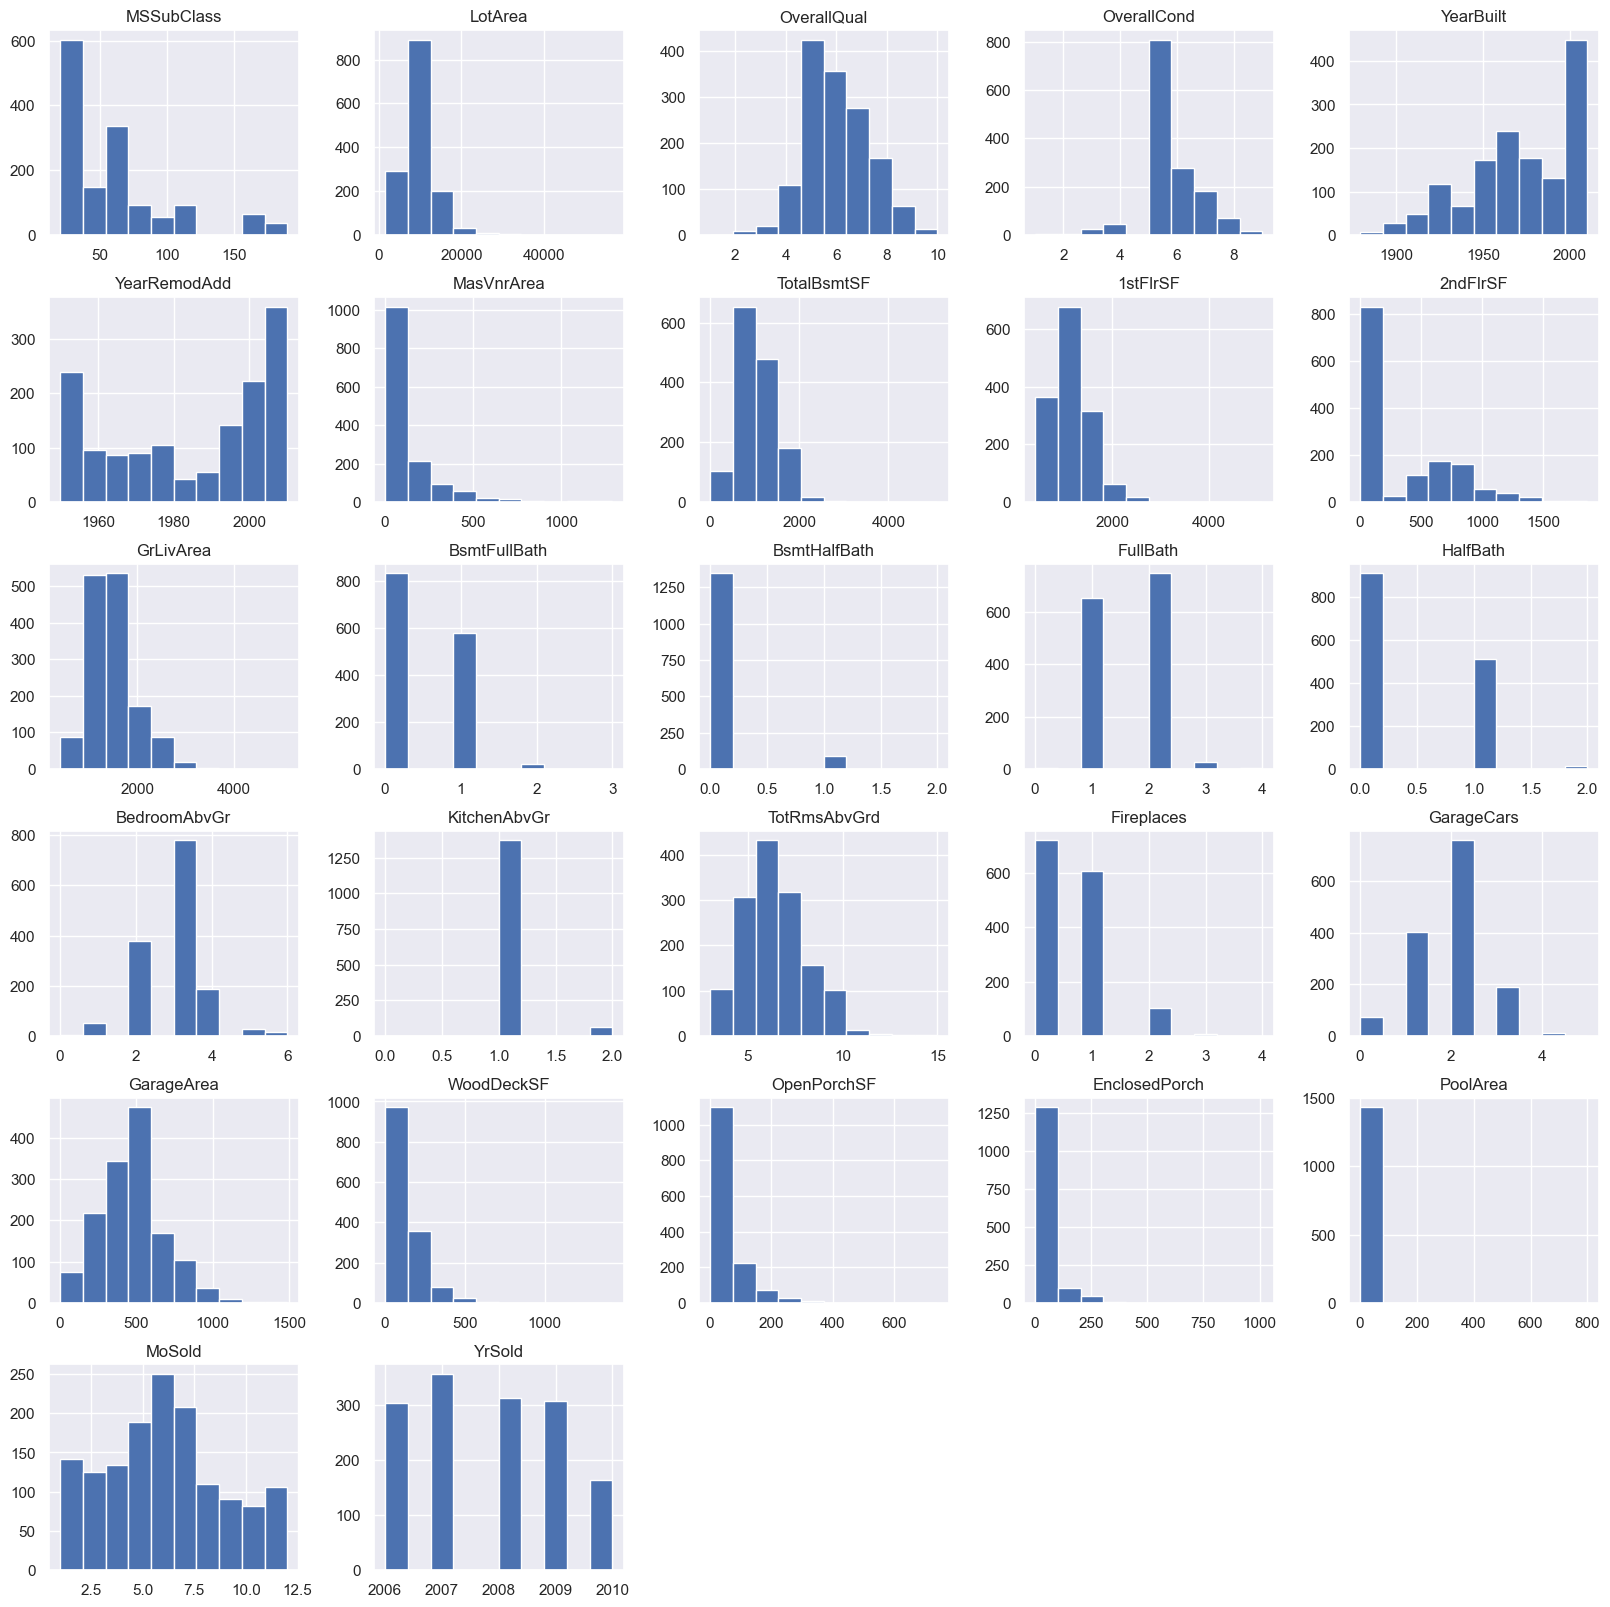

In [73]:
fig = plt.figure(figsize=(20,20))
ax=fig.gca()
Testdata_no_mv.hist(ax=ax)
plt.show()

In [74]:
q = Testdata_no_mv['LotArea'].quantile(0.99)
Testdata_1 = Testdata_no_mv[Testdata_no_mv['LotArea']<q]
Testdata_1.describe(include='all')

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold
count,1422.000000,1422.000000,1422,1422,1422,1422,1422,1422.000000,1422.000000,1422.000000,1422.000000,1422,1422,1422,1422.000000,1422,1422,1422.000000,1422,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422,1422.000000,1422,1422.000000,1422.000000,1422.000000,1422,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
unique,NaN,NaN,4,5,25,5,7,NaN,NaN,NaN,NaN,4,12,15,NaN,4,6,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Reg,Inside,NAmes,1Fam,1Story,NaN,NaN,NaN,NaN,CompShg,VinylSd,VinylSd,NaN,TA,PConc,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,920,1058,217,1170,722,NaN,NaN,NaN,NaN,1407,496,494,NaN,874,640,NaN,1324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,743,NaN,1331,NaN,NaN,NaN,1274,NaN,NaN,NaN,NaN,NaN,NaN
mean,57.746132,9476.065401,NaN,NaN,NaN,NaN,NaN,6.081575,5.572433,1971.345288,1983.633615,NaN,NaN,NaN,100.102672,NaN,NaN,1042.549226,NaN,1148.364979,326.648383,1478.568917,0.437412,0.066104,1.567511,0.372714,2.853024,1.043601,NaN,6.377637,NaN,0.574543,1.761603,471.011252,NaN,93.333333,47.392405,23.929677,1.395218,6.092124,2007.779184
std,42.878495,3770.777272,NaN,NaN,NaN,NaN,NaN,1.421296,1.099561,30.248042,21.029488,NaN,NaN,NaN,174.091241,NaN,NaN,424.419889,NaN,376.874585,421.124976,474.425342,0.531836,0.254151,0.553295,0.500852,0.829727,0.211054,NaN,1.494114,NaN,0.641953,0.774407,215.541777,NaN,126.762413,67.030306,66.925983,27.085912,2.710645,1.307334
min,20.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,1879.000000,1950.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,407.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7316.500000,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1953.000000,1964.000000,NaN,NaN,NaN,0.000000,NaN,NaN,784.000000,NaN,872.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,1.000000,316.250000,NaN,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,9355.000000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1973.000000,1992.000000,NaN,NaN,NaN,0.000000,NaN,NaN,988.000000,NaN,1074.000000,0.000000,1424.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,0.000000,2.000000,478.000000,NaN,0.000000,28.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11378.750000,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2000.000000,2003.750000,NaN,NaN,NaN,164.000000,NaN,NaN,1297.500000,NaN,1371.500000,673.750000,1717.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,2.000000,576.000000,NaN,168.000000,70.000000,0.000000,0.000000,8.000000,2009.000000


In [75]:
q = Testdata_1['TotalBsmtSF'].quantile(0.99)
Testdata_2 = Testdata_1[Testdata_1['TotalBsmtSF']<q]
Testdata_2.describe(include='all')

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold
count,1407.000000,1407.000000,1407,1407,1407,1407,1407,1407.000000,1407.000000,1407.000000,1407.000000,1407,1407,1407,1407.000000,1407,1407,1407.000000,1407,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407,1407.000000,1407,1407.000000,1407.000000,1407.000000,1407,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
unique,NaN,NaN,4,5,25,5,7,NaN,NaN,NaN,NaN,4,12,15,NaN,4,6,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Reg,Inside,NAmes,1Fam,1Story,NaN,NaN,NaN,NaN,CompShg,VinylSd,VinylSd,NaN,TA,PConc,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,913,1049,217,1156,707,NaN,NaN,NaN,NaN,1392,487,485,NaN,874,627,NaN,1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,743,NaN,1316,NaN,NaN,NaN,1259,NaN,NaN,NaN,NaN,NaN,NaN
mean,58.077470,9430.438522,NaN,NaN,NaN,NaN,NaN,6.051173,5.578536,1971.000000,1983.415778,NaN,NaN,NaN,95.417200,NaN,NaN,1027.897655,NaN,1134.776119,330.130775,1468.500355,0.428571,0.066809,1.564321,0.371002,2.858564,1.044065,NaN,6.358920,NaN,0.565032,1.750533,467.026297,NaN,92.305615,46.956645,24.135039,1.307747,6.092395,2007.773276
std,42.908356,3756.404019,NaN,NaN,NaN,NaN,NaN,1.395562,1.103812,30.215301,21.024333,NaN,NaN,NaN,165.668168,NaN,NaN,401.677485,NaN,354.550566,422.004517,466.409366,0.525706,0.255411,0.554260,0.500595,0.827537,0.212129,NaN,1.487201,NaN,0.636603,0.769917,212.186423,NaN,126.462350,66.848581,67.228112,26.962618,2.706347,1.309413
min,20.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,1879.000000,1950.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,407.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7304.500000,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1953.000000,1963.000000,NaN,NaN,NaN,0.000000,NaN,NaN,784.000000,NaN,870.000000,0.000000,1109.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,1.000000,315.000000,NaN,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,9337.000000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1973.000000,1992.000000,NaN,NaN,NaN,0.000000,NaN,NaN,984.000000,NaN,1072.000000,0.000000,1418.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,0.000000,2.000000,474.000000,NaN,0.000000,28.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11277.500000,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2000.000000,2003.000000,NaN,NaN,NaN,160.500000,NaN,NaN,1283.000000,NaN,1363.000000,676.000000,1701.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,2.000000,576.000000,NaN,168.000000,70.000000,0.000000,0.000000,8.000000,2009.000000


In [76]:
q = Testdata_2['1stFlrSF'].quantile(0.99)
Testdata_3 = Testdata_2[Testdata_2['1stFlrSF']<q]
Testdata_3.describe(include='all')

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold
count,1392.000000,1392.000000,1392,1392,1392,1392,1392,1392.000000,1392.000000,1392.000000,1392.000000,1392,1392,1392,1392.000000,1392,1392,1392.000000,1392,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392,1392.000000,1392,1392.000000,1392.000000,1392.000000,1392,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000
unique,NaN,NaN,4,5,25,5,7,NaN,NaN,NaN,NaN,4,12,15,NaN,4,6,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Reg,Inside,NAmes,1Fam,1Story,NaN,NaN,NaN,NaN,CompShg,VinylSd,VinylSd,NaN,TA,PConc,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,907,1040,217,1142,695,NaN,NaN,NaN,NaN,1377,484,483,NaN,870,621,NaN,1294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741,NaN,1304,NaN,NaN,NaN,1244,NaN,NaN,NaN,NaN,NaN,NaN
mean,58.250718,9374.390086,NaN,NaN,NaN,NaN,NaN,6.036638,5.578305,1970.870690,1983.334770,NaN,NaN,NaN,93.354885,NaN,NaN,1021.297414,NaN,1123.311782,332.895833,1459.839799,0.427443,0.065374,1.558908,0.369253,2.854885,1.043822,NaN,6.345546,NaN,0.556753,1.744971,464.979167,NaN,91.227011,46.906609,24.273707,0.583333,6.081178,2007.775862
std,42.902138,3726.241392,NaN,NaN,NaN,NaN,NaN,1.388857,1.101422,30.294181,21.064517,NaN,NaN,NaN,161.750788,NaN,NaN,394.099309,NaN,338.138670,422.973968,460.663777,0.525874,0.250163,0.552863,0.500326,0.826714,0.211677,NaN,1.485804,NaN,0.626239,0.769879,211.665863,NaN,125.868012,67.038686,67.434324,15.451190,2.701256,1.310816
min,20.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,1879.000000,1950.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,407.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7278.500000,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1953.000000,1963.000000,NaN,NaN,NaN,0.000000,NaN,NaN,782.000000,NaN,868.000000,0.000000,1103.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,1.000000,312.750000,NaN,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,9279.000000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1972.000000,1991.500000,NaN,NaN,NaN,0.000000,NaN,NaN,982.000000,NaN,1068.500000,0.000000,1409.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,0.000000,2.000000,473.000000,NaN,0.000000,27.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11195.500000,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2000.000000,2003.000000,NaN,NaN,NaN,156.000000,NaN,NaN,1270.500000,NaN,1353.750000,678.000000,1691.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,2.000000,576.000000,NaN,168.000000,70.000000,0.000000,0.000000,8.000000,2009.000000


In [77]:
q = Testdata_3['GrLivArea'].quantile(0.99)
Testdata_4 = Testdata_3[Testdata_3['GrLivArea']<q]
Testdata_4.describe(include='all')

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold
count,1378.000000,1378.000000,1378,1378,1378,1378,1378,1378.000000,1378.000000,1378.000000,1378.000000,1378,1378,1378,1378.000000,1378,1378,1378.000000,1378,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378,1378.000000,1378,1378.000000,1378.000000,1378.000000,1378,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
unique,NaN,NaN,4,5,25,5,7,NaN,NaN,NaN,NaN,4,12,15,NaN,4,6,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Reg,Inside,NAmes,1Fam,1Story,NaN,NaN,NaN,NaN,CompShg,VinylSd,VinylSd,NaN,TA,PConc,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,903,1031,216,1129,695,NaN,NaN,NaN,NaN,1364,481,480,NaN,868,610,NaN,1280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741,NaN,1293,NaN,NaN,NaN,1230,NaN,NaN,NaN,NaN,NaN,NaN
mean,58.142235,9325.500726,NaN,NaN,NaN,NaN,NaN,6.018142,5.582729,1970.708999,1983.199565,NaN,NaN,NaN,89.716255,NaN,NaN,1017.666183,NaN,1119.106676,321.007983,1443.783745,0.427431,0.064586,1.550798,0.362119,2.844702,1.044267,NaN,6.316401,NaN,0.550073,1.732946,460.989840,NaN,89.769231,46.457184,24.140058,0.589260,6.063861,2007.785196
std,43.028458,3672.038794,NaN,NaN,NaN,NaN,NaN,1.376361,1.100297,30.317711,21.106675,NaN,NaN,NaN,154.968355,NaN,NaN,393.285085,NaN,336.601395,407.662619,433.544381,0.526180,0.248820,0.547619,0.497125,0.821271,0.212704,NaN,1.460208,NaN,0.622178,0.763037,208.110282,NaN,123.103521,66.928071,67.223200,15.529425,2.693544,1.310374
min,20.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,1879.000000,1950.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,407.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7233.000000,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1953.000000,1963.000000,NaN,NaN,NaN,0.000000,NaN,NaN,782.000000,NaN,864.500000,0.000000,1100.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,1.000000,312.000000,NaN,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,9256.500000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1972.000000,1991.000000,NaN,NaN,NaN,0.000000,NaN,NaN,977.500000,NaN,1064.000000,0.000000,1403.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,0.000000,2.000000,472.000000,NaN,0.000000,26.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11104.750000,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2000.000000,2003.000000,NaN,NaN,NaN,148.750000,NaN,NaN,1256.000000,NaN,1342.000000,672.000000,1681.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,2.000000,576.000000,NaN,168.000000,69.000000,0.000000,0.000000,8.000000,2009.000000


In [78]:
Testdata_4.isnull().sum()

MSSubClass       0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
Foundation       0
TotalBsmtSF      0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
PoolArea         0
MoSold           0
YrSold           0
dtype: int64

In [79]:
Testdata_4 =Testdata_4.drop(['YearRemodAdd'],axis=1)

In [80]:
Testdata_4

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold
0,20,11622,Reg,Inside,NAmes,1Fam,1Story,5,6,1961,CompShg,VinylSd,VinylSd,0.0,TA,CBlock,882.0,Y,896,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,6,2010
1,20,14267,IR1,Corner,NAmes,1Fam,1Story,6,6,1958,CompShg,Wd Sdng,Wd Sdng,108.0,TA,CBlock,1329.0,Y,1329,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,6,2010
2,60,13830,IR1,Inside,Gilbert,1Fam,2Story,5,5,1997,CompShg,VinylSd,VinylSd,0.0,TA,PConc,928.0,Y,928,701,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,3,2010
3,60,9978,IR1,Inside,Gilbert,1Fam,2Story,6,6,1998,CompShg,VinylSd,VinylSd,20.0,TA,PConc,926.0,Y,926,678,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,2.0,470.0,Y,360,36,0,0,6,2010
4,120,5005,IR1,Inside,StoneBr,TwnhsE,1Story,8,5,1992,CompShg,HdBoard,HdBoard,0.0,Gd,PConc,1280.0,Y,1280,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,2.0,506.0,Y,0,82,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,Reg,Inside,MeadowV,Twnhs,2Story,4,7,1970,CompShg,CemntBd,CmentBd,0.0,TA,CBlock,546.0,Y,546,546,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,0.0,0.0,Y,0,0,0,0,6,2006
1455,160,1894,Reg,Inside,MeadowV,TwnhsE,2Story,4,5,1970,CompShg,CemntBd,CmentBd,0.0,TA,CBlock,546.0,Y,546,546,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,1.0,286.0,Y,0,24,0,0,4,2006
1456,20,20000,Reg,Inside,Mitchel,1Fam,1Story,5,7,1960,CompShg,VinylSd,VinylSd,0.0,TA,CBlock,1224.0,Y,1224,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,2.0,576.0,Y,474,0,0,0,9,2006
1457,85,10441,Reg,Inside,Mitchel,1Fam,SFoyer,5,5,1992,CompShg,HdBoard,Wd Shng,0.0,TA,PConc,912.0,Y,970,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,0.0,0.0,Y,80,32,0,0,7,2006


In [81]:
Testdata_with_dummies = pd.get_dummies(Testdata_4,drop_first=True)
Testdata_with_dummies

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y
0,20,11622,5,6,1961,0.0,882.0,896,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,6,2010,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
1,20,14267,6,6,1958,108.0,1329.0,1329,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,6,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
2,60,13830,5,5,1997,0.0,928.0,928,701,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,3,2010,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
3,60,9978,6,6,1998,20.0,926.0,926,678,1604,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,6,2010,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
4,120,5005,8,5,1992,0.0,1280.0,1280,0,1280,0.0,0.0,2,0,2,1,5,0,2.0,506.0,0,82,0,0,1,2010,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,1970,0.0,546.0,546,546,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0,0,0,0,6,2006,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
1455,160,1894,4,5,1970,0.0,546.0,54

In [82]:
Testdata_with_dummies.columns.values

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'PoolArea', 'MoSold', 'YrSold', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown

In [83]:
Testinputs = Testdata_with_dummies

In [84]:
Testinputs1 =Testdata_with_dummies

In [85]:
y_hat_test=reg.predict(Testinputs1)

In [87]:
df_pf=pd.DataFrame((y_hat_test),columns=["Predictions"])
df_pf.head()

,Predictions
0,119829.669246
1,159510.937260
2,177177.029482
3,189264.317843
4,203212.987690


In [88]:
df_pf.to_csv('predictions.csv')